In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [6]:

df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.shape

(614, 13)

In [9]:
##cleaning
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df['LoanAmount'] =df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [11]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.dropna(inplace=True)#drop all nulls

In [81]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.shape

(542, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            542 non-null    object 
 1   Gender             542 non-null    object 
 2   Married            542 non-null    object 
 3   Dependents         542 non-null    object 
 4   Education          542 non-null    object 
 5   Self_Employed      542 non-null    object 
 6   ApplicantIncome    542 non-null    int64  
 7   CoapplicantIncome  542 non-null    float64
 8   LoanAmount         542 non-null    float64
 9   Loan_Amount_Term   542 non-null    float64
 10  Credit_History     542 non-null    float64
 11  Property_Area      542 non-null    object 
 12  Loan_Status        542 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 59.3+ KB


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

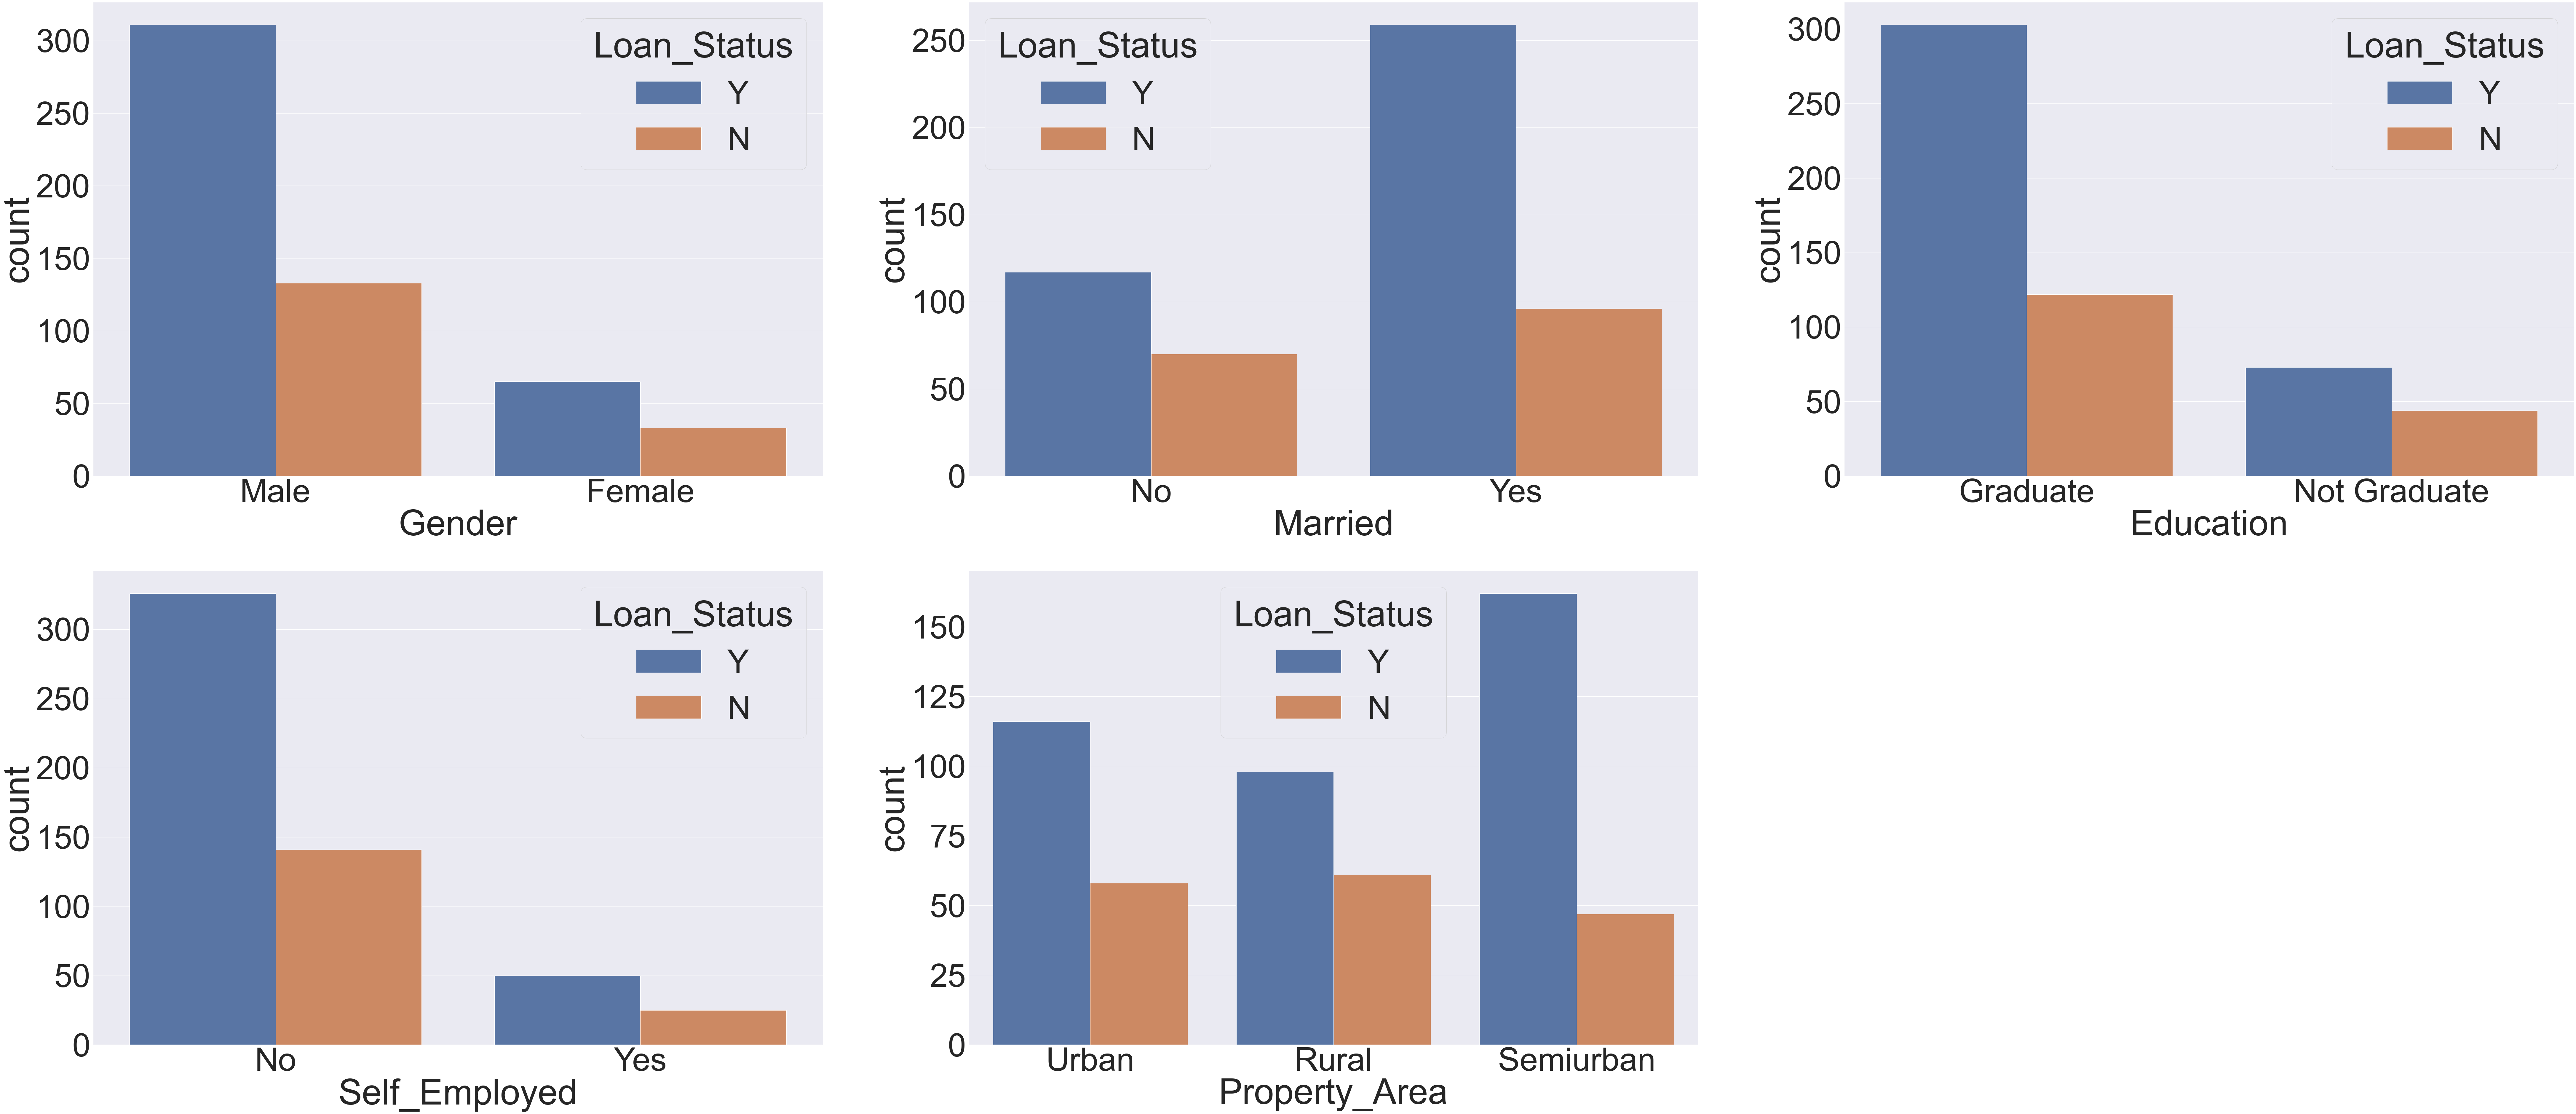

In [16]:
plt.figure(figsize = (150, 100))
sns.set(font_scale = 10)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [36]:
ohe=OneHotEncoder()

In [37]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [48]:
X = df.drop(["Loan_Status","Loan_ID"],axis=1) 
y = df["Loan_Status"]
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


In [51]:
ohe.fit_transform(X[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]).shape

(542, 15)

In [52]:
ohe.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

In [53]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Gender','Married','Dependents','Education','Self_Employed','Property_Area']),
                                        remainder="passthrough")

In [54]:
lr=LogisticRegression()

In [55]:
pipe=make_pipeline(column_trans,lr)

In [56]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Female', 'Male'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['0', '1', '2', '3+'], dtype=object),
                                                                            array(['Graduate', 'Not Graduate'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['Rural', 'Semiurban', 'Urban'], dtype=object)]),
                                                  ['Gender', 'Married',
                                           

In [57]:
y_pred=pipe.predict(X_test)

In [58]:
metrics.accuracy_score(y_pred,y_test)

0.7975460122699386

In [63]:
score=[]
for i in range(4000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=i)
    lr=LogisticRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    score.append(metrics.accuracy_score(y_pred,y_test))
    

In [64]:
np.argmax(score)

0

In [67]:
score[0]

0.7975460122699386

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
lr=LogisticRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.7975460122699386

In [82]:
pd.DataFrame([['Male','No',0,'Graduate','No',5849,0.0,123.0,200.0,0.0,'Rural']],columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_term','Credit_History','Property_Area'])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,123.0,200.0,0.0,Rural


In [90]:
pipe.predict(pd.DataFrame([['Male','No','0','Graduate','No',5849,0.0,123.0,200.0,1.0,'Urban']],columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']))

array(['Y'], dtype=object)

IndexError: index 1 is out of bounds for axis 0 with size 1